In [22]:
using Revise
using Scattering
using SpecialFunctions
using BenchmarkTools
using Test
using Plots
using LaTeXStrings
# using ColorSchemes

In [3]:
# import PyPlot
# plt = PyPlot
# using PyCall
# # line cyclers adapted to colourblind people
# cycler = pyimport("cycler").cycler
# line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
# marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
#                  cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# # matplotlib's standard cycler
# standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# plt.rc("axes", prop_cycle=line_cycler)

# plt.rc("text", usetex=true)
# plt.rc("text.latex", preamble="\\usepackage{newpxtext}\\usepackage{newpxmath}\\usepackage{commath}\\usepackage{mathtools}")
# plt.rc("font", family="serif", size=18.)
# plt.rc("savefig", dpi=200)
# plt.rc("legend", loc="best", fontsize="medium", fancybox=true, framealpha=0.5)
# plt.rc("lines", linewidth=2.5, markersize=10, markeredgewidth=2.5)

In [4]:
# gr() # this is default
# using Plotly
# plotly()
Plots.default(size=(600, 370))
fntf = :Helvetica
titlefont = Plots.font(fntf, pointsize=12)
guidefont = Plots.font(fntf, pointsize=12)
tickfont = Plots.font(fntf, pointsize=9)
legendfont = Plots.font(fntf, pointsize=8)
Plots.default(fontfamily=fntf)
Plots.default(titlefont=titlefont, guidefont=guidefont, tickfont=tickfont, legendfont=legendfont)
Plots.default(minorticks=true)
Plots.default(linewidth=1.2)
Plots.default(foreground_color_legend=nothing)
# Plots.default(framestyle=:box)
# Plots.default(widen=true)
# Plots.default(thickness_scaling=1.5)

In [5]:
q = collect(0.001:0.001:4.0)
qhkl = 2.0
qs = q .- qhkl;

In [6]:
L(x, N) = (sin(N*x/2)/sin(x/2))^2

L (generic function with 1 method)

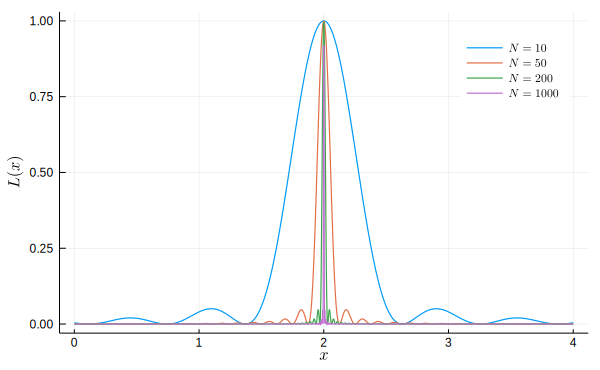

In [7]:
xlab = L"x"
ylab = L"L(x)"
N = 10
plot(q, L.(qs, N)/N^2, xlabel=xlab, ylabel=ylab, label=L"N=10")
N = 50
plot!(q, L.(qs, N)/N^2, label=L"N=50")
N = 200
plot!(q, L.(qs, N)/N^2, label=L"N=200")
N = 1000
plot!(q, L.(qs, N)/N^2, label=L"N=1000")
# savefig("/Users/lyx/Downloads/raw-L.svg")

In [8]:
δ = 0.1
ν = 1.0
σ = √(π/8) * δ

p = peak(δ, ν)
typeof(p)

GeneralizedPeak{Float64}

In [10]:
p_gauss = GaussianPeak(σ)
L_gauss = p_gauss(qs)

fwhm(p_gauss)
# @test fwhm(p_gauss) == √(8log(2.0))σ
if ν > 200
    @test L_gauss ≈ p(qs)
else
    @test_broken L_gauss == p(qs)
end

Test Broken
  Expression: L_gauss == p(qs)

In [21]:
p_loren = LorentzianPeak(δ)
L_loren = p_loren(qs)

# @test fwhm(p_loren) == δ
fwhm(p_loren)
if ν < 0.01
    @test L_loren ≈ p(qs)
else
    @test_broken L_loren == p(qs)
end

Test Broken
  Expression: L_loren == p(qs)

In [12]:
N = length(qs)
L_general = zeros(N);
for i in 0:4
    println(i)
end

s = 0
n = 0
while (s < 100 && n < 10)
    s += n
    n += 1
end
println(s, "\t", n)

0
1
2
3
4
45	10


In [13]:
γν2 = gamma(ν/2)
γν = √π * gamma((ν+1)/2) / γν2
println(γν2)
println(γν)

c = 2/(δ*π)
tol = 1e-4
for i in 1:N
    x = qs[i]
    s = c
    s_prev = 0
    ds = 1.0
    n = 0
    while (ds > tol && n < 2000)
        s_prev = s
        t1 = (γν/(n+ν/2))^2
        t2 = (c * x)^2
        s /= (1 + t1*t2)
        ds = abs(s - s_prev)
        n += 1
    end
#     println(i, "\t", x, "\t", ds, "\t", n)
    L_general[i] = s
end
# for i in 1:N
#     x = qs[i]
#     y = γν * c^2 * x^2
#     z = gamma(ν/2 + im * y) / γν2
#     L_general[i] = c * real(z * conj(z))
# end

# y = γν * 4 / (π^2*δ^2) * qs.^2
# z = gamma.(ν/2 .+ im * y) / γν2
z = ν/2 + im * 2
real(z*conj(z))
# L_general = (2/(δ*π)) * real(z .* conj(z))

1.772453850905516
0.9999999999999999


4.25

In [14]:
p_general = GeneralizedPeak(δ, ν)
L_general2 = p_general(qs)

if (ν < 0.01 || ν > 200)
    @test_broken L_general2 == L_general
    @test_broken L_general2 == p(qs)
else
    @test L_general2 == L_general
    @test L_general2 == p(qs)
end

Test Passed

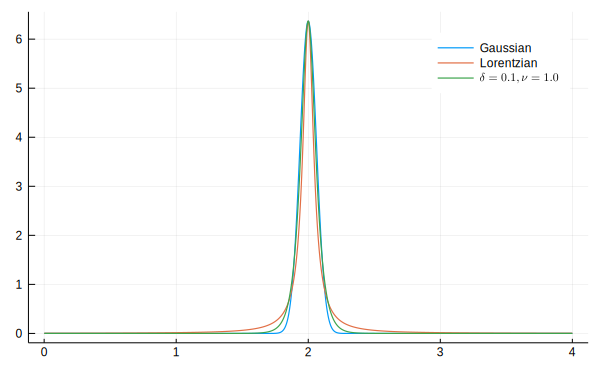

In [15]:
xlab = L"x"
ylab = L"L(x)"
plot(q, L_gauss, label="Gaussian")
plot!(q, L_loren, label="Lorentzian")
# plot!(q, L_general)
plot!(q, L_general2, label=L"\delta = 0.1, \nu = 1.0")
# savefig("/Users/lyx/Downloads/all-L.svg")

In [ ]:
function emul(N)
    z = complex(0.0)
    for i in 1:N::Integer
        z += exp(im*rand())
    end
    z
end

function myabs1(N)
    z = emul(N)
    real(z*conj(z))
end

myabs2(N) = abs2(emul(N))

N = 100000

In [ ]:
@btime myabs1($N)

In [ ]:
@btime myabs2($N)

In [ ]:
@code_native myabs1(N)

In [ ]:
@code_native myabs2(N)

In [ ]:
@test 1==1

In [ ]:
collect(1:10)

In [16]:
p_gauss(0.0)

6.366197723675815

In [17]:
p_loren(0.0)

6.366197723675812

In [18]:
p_general(0.0)

6.366197723675814

In [19]:
@btime Scattering.Peak._compute_single_point($p_general, 0.2, 1e-4, 20000)

  207.266 ns (0 allocations: 0 bytes)


0.2391998783528447

In [20]:
@code_warntype Scattering.Peak._compute_single_point(p_general, 0.2, 1e-4, 20000)

Variables
  #self#::Core.Compiler.Const(Scattering.Peak._compute_single_point, false)
  p::GeneralizedPeak{Float64}
  q::Float64
  tol::Float64
  nmax::Int64
  c::Float64
  s::Float64
  s_prev::Float64
  ds::Float64
  n::Int64
  t1::Float64
  t2::Float64
  @_13::Bool

Body::Float64
1 ─ %1  = Base.getproperty(p, :δ)::Float64
│   %2  = (%1 * Scattering.Peak.π)::Float64
│         (c = 2 / %2)
│         (s = c)
│         (s_prev = 0.0)
│         (ds = 1.0)
└──       (n = 0)
2 ┄ %8  = (ds > tol)::Bool
└──       goto #4 if not %8
3 ─       (@_13 = n < nmax)
└──       goto #5
4 ─       (@_13 = false)
5 ┄       goto #7 if not @_13
6 ─       (s_prev = s)
│   %15 = Base.getproperty(p, :γν)::Float64
│   %16 = n::Int64
│   %17 = Base.getproperty(p, :ν)::Float64
│   %18 = (%17 / 2)::Float64
│   %19 = (%16 + %18)::Float64
│   %20 = (%15 / %19)::Float64
│   %21 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %22 = (%21)()::Core.Compiler.Const(Val{2}(), false)
│         (t1 = Ba